# Unsupervised Learning

### Import Packages

In [1]:
import time
from copy import deepcopy

import pandas as pd
import numpy as np
import numpy.linalg as LA

import seaborn as sb
from sklearn.datasets import make_blobs
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [3]:
path = 'Data.csv'
Data = pd.read_csv(path)

## Data Visualisation/Preprocessing

In [4]:
Data.shape

(150, 4)

In [5]:
Data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      150 non-null    float64
 1   f2      150 non-null    float64
 2   f3      150 non-null    float64
 3   f4      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
class DataLoader:
    def __init__(self, seed=0):
        np.random.seed(seed)
    
    def normalize(self, df, target=None, plot=False):
        df_ = df - df.min()
        normalized = df_/(df.max()-df.min())
        normalizedX = normalized
        if target:
            standardizedX[f'{target}'] = df[f'{target}']
        if plot:
            sb.pairplot(df, corner=True)
        return normalizedX
    
    def standarize(self, df, target=None, plot=False):
        df_ = df - df.mean()
        standardized = df_/df.std()
        standardizedX = standardized
        if target:
            standardizedX[f'{target}'] = df[f'{target}']
        if plot:
            sb.pairplot(df, corner=True)
        return standardizedX
    
    def preprocess(self):
        pass
    
    
    def df2x_np(self, df, bias=True):
        return df.to_numpy()
    

In [8]:
dl = DataLoader()

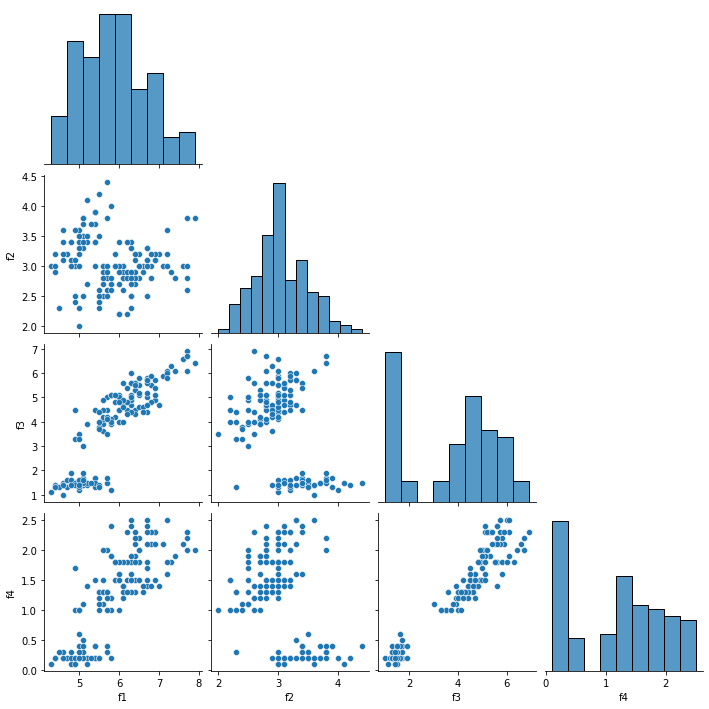

In [9]:
_ = dl.standarize(Data, plot=True)

## Clustering

<b>Inputs:</b><br>
Data, K (# of clusters) <br>

<b>Algorithm:</b><br>
Iterative Optimizarion, Eulcidian Distance<br>

<b>Outputs:</b><br>
K-Clustered Data

### KMeans Algorithm

<b>Repeat {</b><br>
&emsp; 1. Initialize: 𝜇<br>
&emsp; 2. Assig: x -> 𝜇<br>
&emsp; 3. Update 𝜇<br>
<b>}</b>

In [10]:
class KMeans:
    def __init__(self, K, nIter, eStop=False, seed=0):
        self.K = K
        self.nIter = nIter
        self.eStop = eStop
        np.random.seed(seed)

        # 1a. Init: 𝜇 (Centroids of clusters), empty clusters
        self.𝜇  = None # entroids
        self.C = None  # clusters

    def cluster(self, df, animate=False):
        X = dl.df2x_np(df)
        # 1b. Init: 𝜇 (Centroids of clusters), empty clusters
        if self.𝜇 == None:
            self.__initialize(X)
            
        for n in range(self.nIter):
            # 2. Assign xi's to 𝜇j's
            self.__assignment(X)
            loss = self.__evaluate(X)
            if animate:
                self.__animate(df, n, loss, close=False)
                
            # 3.  Update 𝜇j
            prev = self.𝜇
            self.__update(X)
            loss = self.__evaluate(X)
            if animate:
                self.__animate(df, n, loss, close=True)
                
            # Early  Stopping
            if self.eStop:
                if self.__converged:
                    print(f'Early Stopping at Iter {n}!')
                    break
    
    def __evaluate(self, X):
        loss = 0
        for j, c in enumerate(self.C):
            loss_j = 0
            for i in c:
                loss_j += LA.norm(X[i] - self.𝜇[j])
            loss_j /= len(c)
            loss += loss_j
        loss /= len(self.C)
        return loss

#     def predict(self, X):
#         prediction = np.empty(len(X))
#         for j, cluster in enumerate(self.C):
#             for i in cluster:
#                 prediction[i] = j
#         return prediction



    def __initialize(self, X):
        inds = np.random.choice(X.shape[0], self.K)
        self.𝜇  = [ X[inx] for inx in inds ]

    def __assignment(self, X): # Assign an example 2 a cluster
        self.C = [ [] for _ in range(self.K) ]
        for i, x in enumerate(X):
            j = self.__nearest_cent(x)
            self.C[j].append(i)

    def __update(self, X): # Update the centroids
        for j, c in enumerate(self.C):
            mean = np.mean(X[c], axis=0)
            self.𝜇[j] = mean


    def __nearest_cent(self, x):
        min_j = np.argmin([ LA.norm(x-𝜇j) for 𝜇j in self.𝜇 ])
        return min_j

    def __converged(self, prev):
        magnitude = sum([LA.norm(prev[j] - self.𝜇[j]) for j in self.K])
        return magnitude == 0
    
    def __animate(self, df_, n, loss, close=False):
            
        df = deepcopy(df_)
        df['Cluster'] = np.nan
        for j, cluster in enumerate(self.C):
            for i in cluster:
                df['Cluster'].loc[i] = j
        for l in self.μ:
            s = pd.Series([*l, 'μ'], index = df.columns)
            df = df.append(s, ignore_index=True)
                
        
        sb.set_style("darkgrid")
        pg = sb.PairGrid(df, hue='Cluster', corner=True, diag_sharey=False)
            
        pg.fig.suptitle(f'Iter {n}, Loss {round(loss, 4)}')

        pg.map_lower(sb.scatterplot)
        pg.map_diag(sb.histplot)
        
        pg.add_legend()
        
        
        display(pg.fig)
        clear_output(wait = True)
        if close and n == self.nIter - 1:
            plt.show()
        else:
            plt.close()


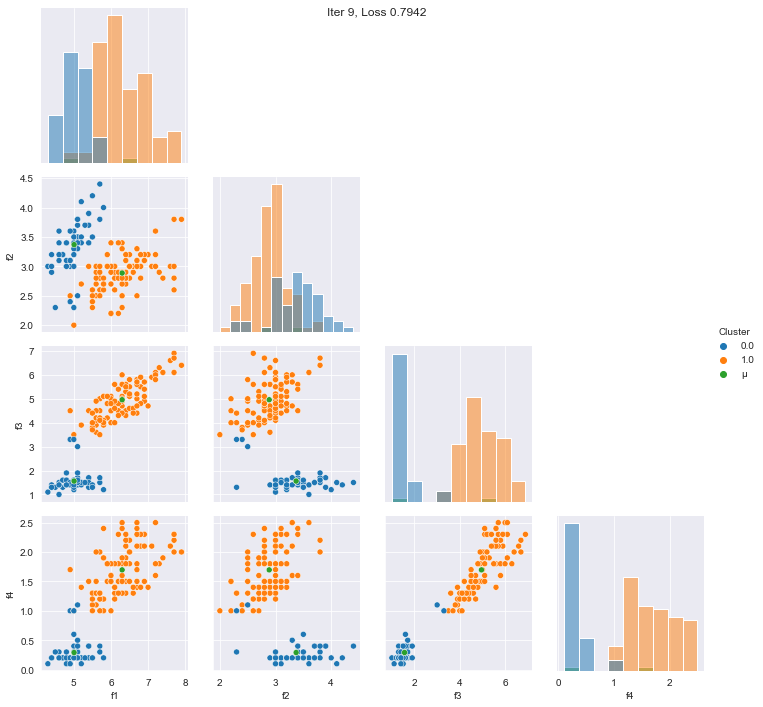

In [11]:
Data_stz = dl.standarize(Data)
k_means = KMeans(K=2, nIter=10, eStop=False, seed=1)
k_means.cluster(Data, animate=True)

## Dimensionallity Reduction 

<b>Inputs:</b><br>
Data, K (# of low-dim) <br>

<b>Algorithm:</b><br>
Projection, Transformation<br>

<b>Outputs:</b><br>
K-dim feature space

In [12]:
path = 'Data.csv'
Data = pd.read_csv(path)

### Algoithm

In [13]:
class PCA:
    def __init__(self, K, seed=0):
        self.K = K
        self.pc = None
        self.var = None
        self.mean = None
    
    def project(self, df_):
        self.mean = df_.mean().to_numpy()
        df = df_ - self.mean # R^Nxd
        CM = np.cov(df.T) # R^dxd
        self.eVal, self.eVec = LA.eig(CM)
        self.pc = self.eVec[:self.K]
        self.var = self.eVal[:self.K]
#         return self.pc.T, self.var
    
    def transform(self, df_):
        df = df_ - self.mean
        df = df@self.pc.T
        df.columns = [f'pc {i+1}' for i in range(self.pc.shape[0])]
        return df
    
    def __plot(self, df):
        pass

In [14]:
pca = PCA(2, seed=0)
pca.project(Data)

In [15]:
df_pca = pca.transform(Data)

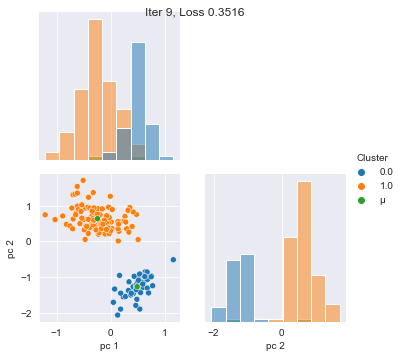

In [16]:
k_means = KMeans(K=2, nIter=10, eStop=False, seed=0)
k_means.cluster(df_pca, animate=True)